In [1]:
# if jupyterlab:
%matplotlib widget
# if jupyter notebook:
# %matplotlib notebook

import os
import torch
import numpy as np 
from recoMRD_B0 import recoMRD_B0
import matplotlib.pyplot as plt


def plot3D(img:np.ndarray, cmap='turbo', clim=None, pos = None):
    img = img.squeeze()
    if pos is None:
        pos = [x//2 for x in img.shape[0:3]]
        
    plt.figure()
    plt.subplot(131)
    plt.imshow(img[:,:,pos[2]], cmap=cmap, origin='lower',clim=clim)
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(img[:,pos[1],:], cmap=cmap, origin='lower',clim=clim)
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(img[pos[0],:,:], cmap=cmap, origin='lower',clim=clim)
    plt.axis('off')
    plt.colorbar()
    plt.tight_layout() 


filename = './../example_data/meas_MID00575_FID29449_aa_B0Phantom.mrd'
recoObj_B0 = recoMRD_B0(filename)
print(recoObj_B0.img.shape)
print(recoObj_B0.img_b0.shape)
print(recoObj_B0.img_mag.shape)

Number of reference scans: 0
Number of image     scans: 17600
k-space size in protocol: 220 x 110 x 80
image   size in protocol: 110 x 110 x 80
Existing scans: image_scan.
Fully sampled array size=[32, 220, 110, 80, 1, 2, 1, 1, 1, 1, 1]
RO zero pad index = 2


Filling image_scan, size=[32, 216, 110, 80, 1, 2, 1, 1, 1, 1, 1]: 100%|██████████| 17600/17600 [00:02<00:00, 7829.62it/s]


Removing oversampling...
Done!


Fourier transform: 100%|██████████| 32/32 [00:00<00:00, 87.34it/s]


Calculating B0 map. ΔTE = 3.5 ms
torch.Size([1])
torch.Size([1, 110, 110, 80, 1, 1, 1, 1, 1, 1, 1])
torch.Size([1, 110, 110, 80, 1, 2, 1, 1, 1, 1, 1])


torch.Size([1, 110, 110, 80, 1, 2, 1, 1, 1, 1, 1])


/kyb/agks/aaghaeifar/.local/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:477: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Unwrapping B0...
torch.Size([1, 110, 110, 80, 1, 1, 1, 1, 1, 1, 1])


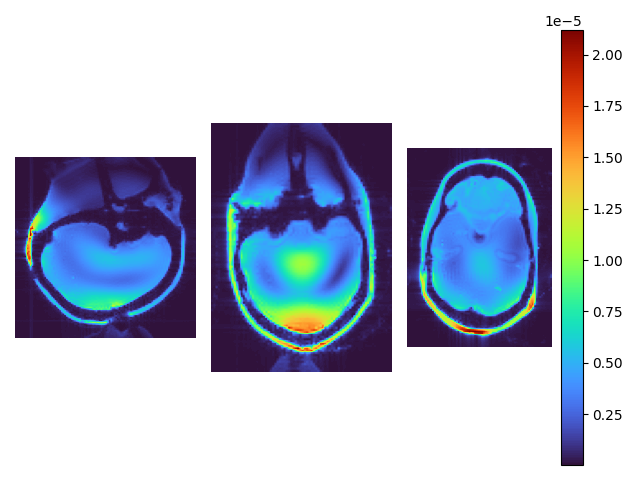

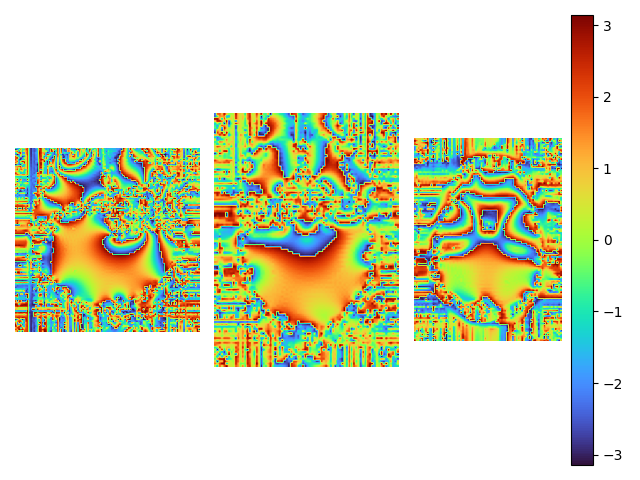

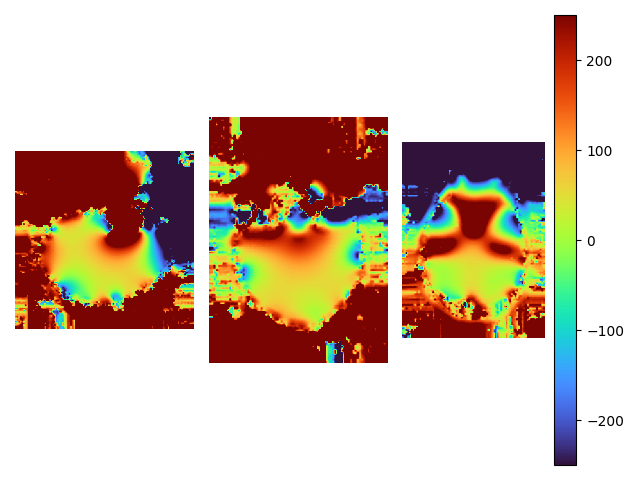

In [7]:
plot3D(recoObj_B0.img_mag.index_select(recoObj_B0.dim_info['eco']['ind'], torch.Tensor([0]).int()).numpy())
plot3D(recoObj_B0.img_b0.numpy())
b0_hz = recoObj_B0.get_b0hz()
print(b0_hz.shape)
plot3D(b0_hz.numpy(), clim=[-250,250])
folder = './../example_data'
recoObj_B0.make_nifti(recoObj_B0.img_b0, os.path.join(folder, 'b0.nii'))
# recoObj_B0.make_nifti(b0_uw, os.path.join(folder, 'b0_uw.nii'))
recoObj_B0.make_nifti(b0_hz, os.path.join(folder, 'b0_hz.nii'))